In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\admin\Downloads\USArrests.csv")

In [3]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data.shape

(50, 5)

In [5]:
data['Unnamed: 0'].nunique()

50

In [6]:
data = data.drop('Unnamed: 0',axis=1)

In [7]:
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [8]:
data.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [9]:
x = data[['Murder','Assault','UrbanPop','Rape']]

In [10]:
from sklearn.cluster import KMeans

In [11]:
wcss =[]
for i in range(1,11):
    km = KMeans(n_clusters=i,n_init=10,init='k-means++')
    km.fit(x)
    css=km.inertia_
    wcss.append(css)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


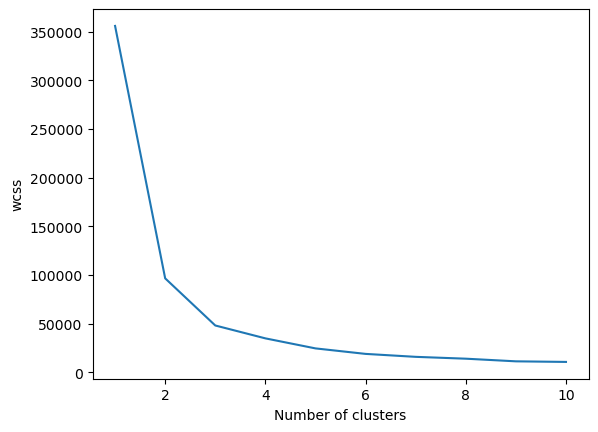

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel("wcss")
plt.show()

In [13]:
km = KMeans(n_clusters=3,n_init =10)

In [14]:
km.fit(x)

KMeans(n_clusters=3)

In [15]:
cluster_labels=km.predict(x)

In [16]:
cluster_labels

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2])

In [17]:
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [18]:
pd.Series(cluster_labels).value_counts()

1    20
0    16
2    14
dtype: int64

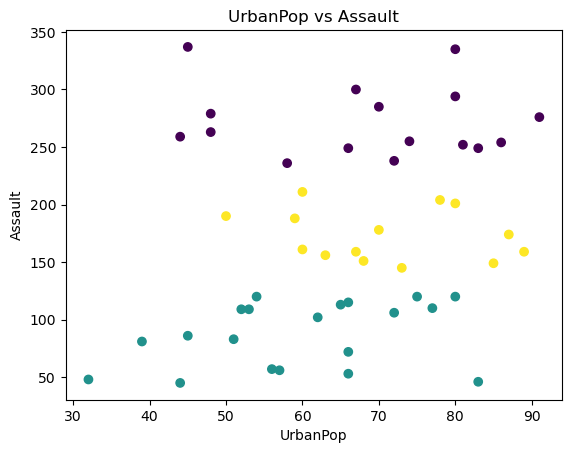

In [19]:
plt.scatter(x['UrbanPop'],x['Assault'],c=cluster_labels)
plt.xlabel('UrbanPop')
plt.ylabel('Assault')
plt.title('UrbanPop vs Assault')
plt.show()

In [20]:
data['cluster_labels']=cluster_labels

In [21]:
data

,Murder,Assault,UrbanPop,Rape,cluster_labels
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,2


C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


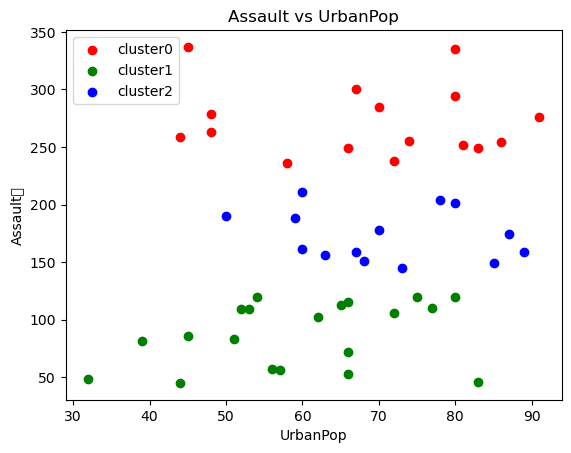

In [22]:
colors = ['r','g','b']
for i in range(max(cluster_labels)+1):
    cluster_data = x[cluster_labels==i]
    plt.scatter(cluster_data['UrbanPop'],cluster_data['Assault'],c=colors[i],label=f'cluster{i}')
plt.xlabel('UrbanPop')
plt.ylabel('Assault	')
plt.title('Assault vs UrbanPop')
plt.legend()   

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
silhouette_avg= silhouette_score(x,cluster_labels)
print(silhouette_avg)

0.5319024108339817


In [25]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [26]:
mergings = linkage(x,method="ward")

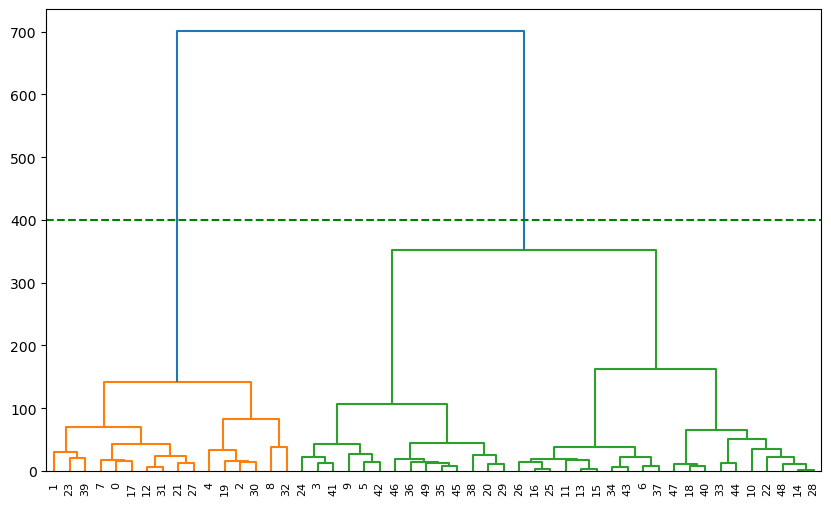

In [27]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.axhline(400,color='green',linestyle='--')
plt.show()

In [28]:
cluster_labels = fcluster(mergings,400,criterion='distance')

In [29]:
cluster_labels

array([1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int32)

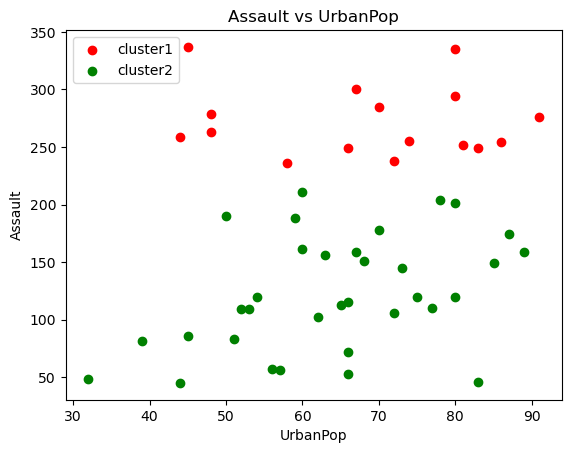

In [30]:
colors = ['r','g']
for cluster_num in range(1,max(cluster_labels)+1):
    cluster_data = x[cluster_labels == cluster_num]
    plt.scatter(cluster_data['UrbanPop'],cluster_data['Assault'],c=colors[cluster_num-1],label=f'cluster{cluster_num}')
plt.xlabel('UrbanPop')
plt.ylabel('Assault')
plt.title('Assault vs UrbanPop')
plt.legend()   

In [31]:
from sklearn.metrics import silhouette_score

In [32]:
silhouette_avg1 = silhouette_score(x,cluster_labels)
print(silhouette_avg1)

0.576270501827592
